Dataset Shape: (5000, 7)

Data Overview:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suit

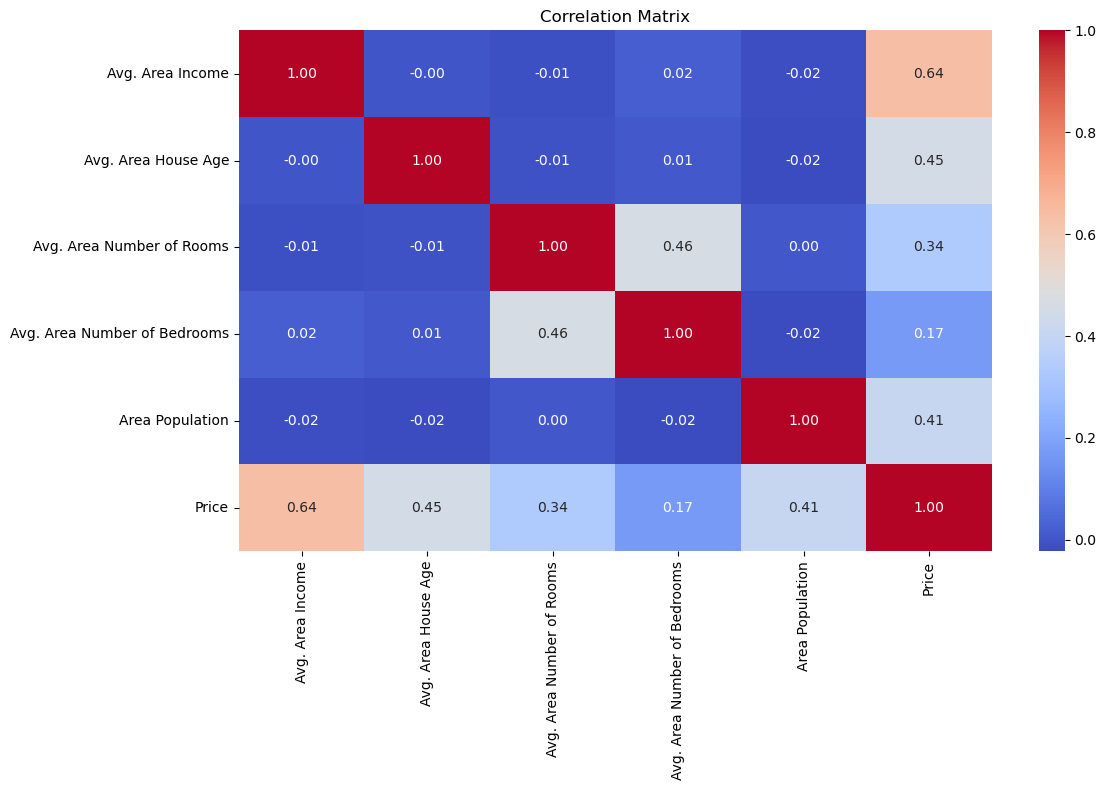

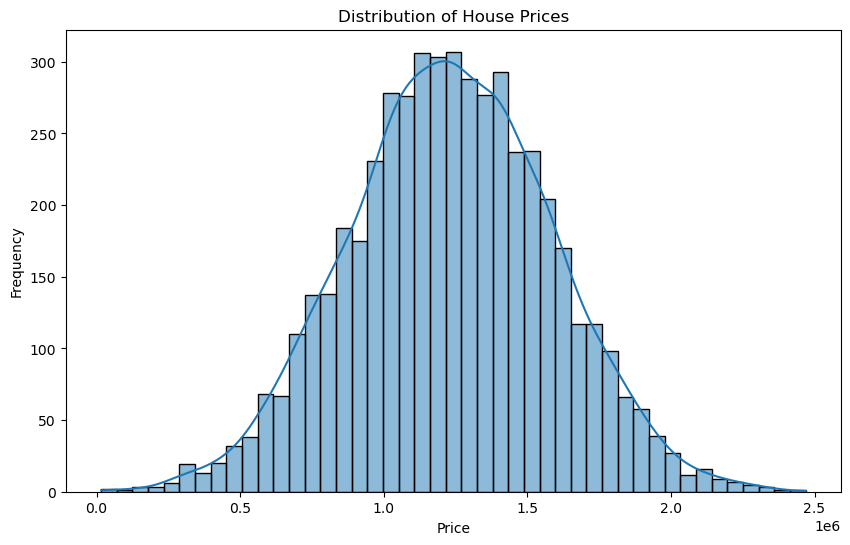

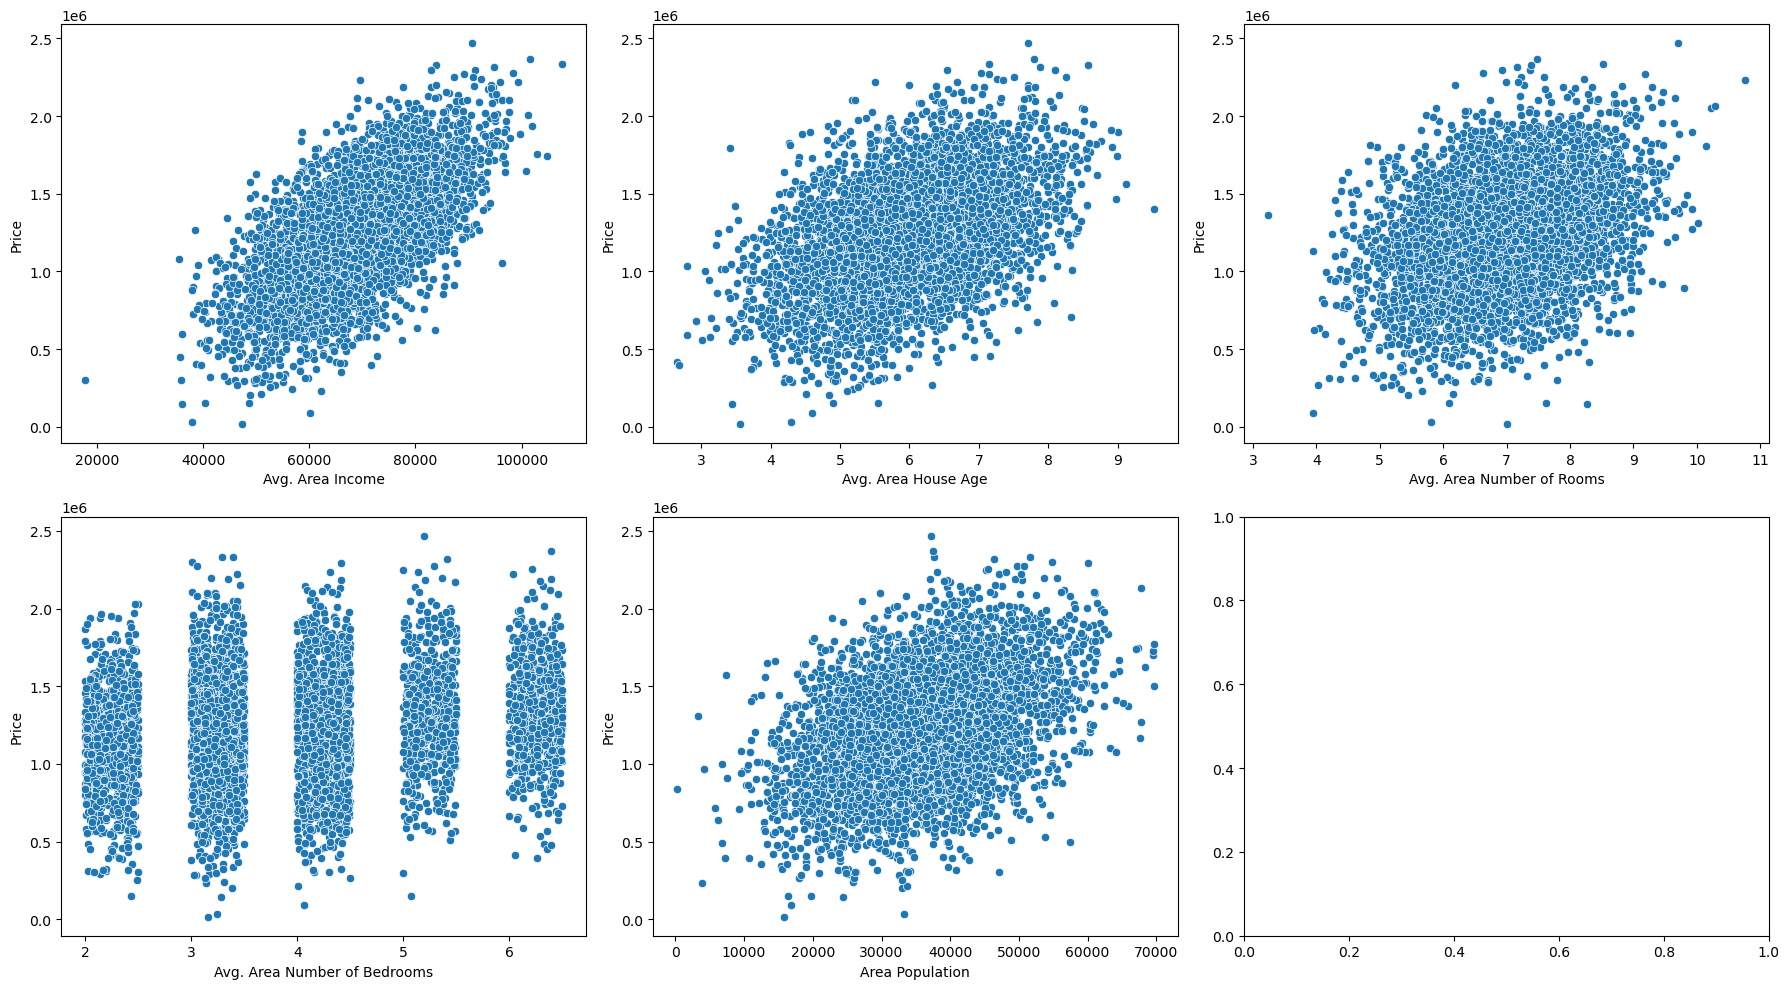


Model Coefficients:
                                Coefficient
Avg. Area Income              231741.876652
Avg. Area House Age           163580.776566
Avg. Area Number of Rooms     120724.771387
Avg. Area Number of Bedrooms    2992.449135
Area Population               152235.900097

Intercept: 1229576.9925600903

Model Performance:
Mean Squared Error: 10089009300.89
Root Mean Squared Error: 100444.06
R-squared: 0.9180


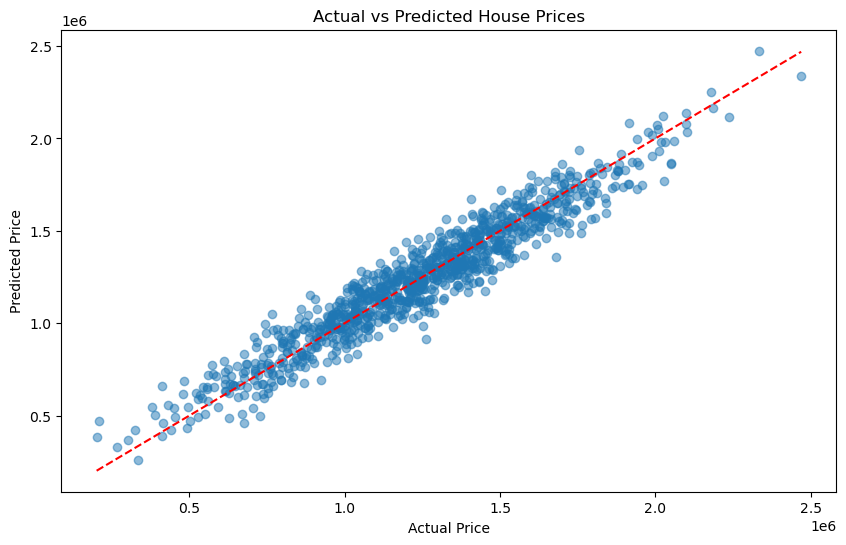

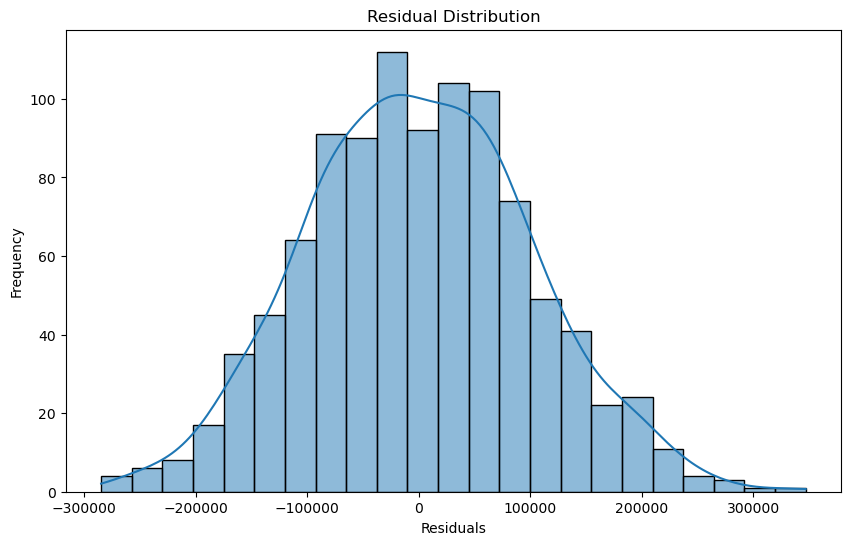

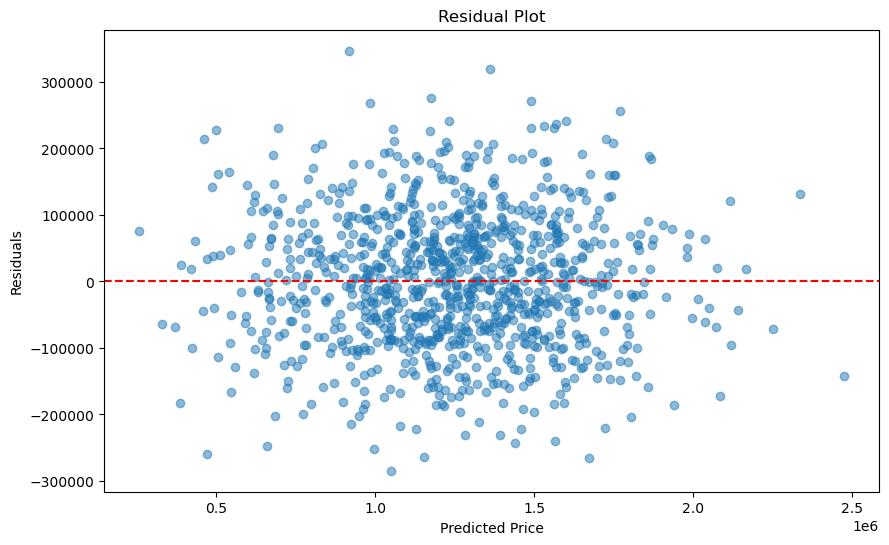


Example Prediction:
Predicted house price: $746918.02

Regression Equation:
Price = $1229576.99 + 231741.88 x Avg. Area Income + 163580.78 x Avg. Area House Age + 120724.77 x Avg. Area Number of Rooms + 2992.45 x Avg. Area Number of Bedrooms + 152235.90 x Area Population


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the dataset 
housing_data = pd.read_csv(r"C:\Users\Prithviraj Ghorpade\Downloads\USA_Housing.csv")

# Basic exploration
print("Dataset Shape:", housing_data.shape)
print("\nData Overview:")
print(housing_data.head())
print("\nColumn Information:")
print(housing_data.info())
print("\nStatistical Summary:")
print(housing_data.describe())

# Check for missing values
print("\nMissing Values:")
print(housing_data.isnull().sum())

# Exploratory Data Analysis - fixing the correlation matrix by excluding the Address column
# First, get only the numeric columns
numeric_data = housing_data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Distribution of target variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Relationship between key features and price
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

sns.scatterplot(x='Avg. Area Income', y='Price', data=housing_data, ax=axes[0])
sns.scatterplot(x='Avg. Area House Age', y='Price', data=housing_data, ax=axes[1])
sns.scatterplot(x='Avg. Area Number of Rooms', y='Price', data=housing_data, ax=axes[2])
sns.scatterplot(x='Avg. Area Number of Bedrooms', y='Price', data=housing_data, ax=axes[3])
sns.scatterplot(x='Area Population', y='Price', data=housing_data, ax=axes[4])
plt.tight_layout()
plt.show()

# Preparing the data
# Explicitly excluding 'Address' as it's a categorical variable and not useful for linear regression
X = housing_data.drop(['Price', 'Address'], axis=1)
y = housing_data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)
print("\nIntercept:", model.intercept_)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")

# Visualizing actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Creating a function to predict house prices
def predict_house_price(area_income, house_age, num_rooms, num_bedrooms, population):
    # Create a dataframe with the input features
    input_data = pd.DataFrame({
        'Avg. Area Income': [area_income],
        'Avg. Area House Age': [house_age],
        'Avg. Area Number of Rooms': [num_rooms],
        'Avg. Area Number of Bedrooms': [num_bedrooms],
        'Area Population': [population]
    })

    # Scale the input data
    input_scaled = scaler.transform(input_data)

    # Make prediction
    predicted_price = model.predict(input_scaled)[0]

    return predicted_price

# Example usage
example_price = predict_house_price(
    area_income=60000,
    house_age=5,
    num_rooms=6,
    num_bedrooms=3,
    population=35000
)

print("\nExample Prediction:")
print(f"Predicted house price: ${example_price:.2f}")

# Create a simple regression equation for easy interpretation
equation = f"Price = ${model.intercept_:.2f}"
for i, feature in enumerate(X.columns):
    equation += f" + {model.coef_[i]:.2f} x {feature}"

print("\nRegression Equation:")
print(equation)